<a href="https://colab.research.google.com/github/LoneAlpha007/Prodigy-Infotech-/blob/main/prodigy_ds_task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *

import plotly.graph_objects as go
from nltk.corpus import stopwords

import geopandas as gpd
import geoplot
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/kaggle/input/accidents-analysis/US_Accidents_March23.csv")

In [ ]:
print("Size of our Dataset:", df.shape)

Size of our Dataset: (7728394, 46)


In [ ]:
pd.set_option('display.max_columns', None)
df.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


In [ ]:
cols2drop = ['End_Lat', 'End_Lng', 'ID', 'Source', 'Airport_Code', 'Country', 'Weather_Timestamp', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Timezone']
df.drop(columns=cols2drop, inplace=True)

In [ ]:
from pprint import pprint
def sanity_check(df):
    pprint('-'*70)
    pprint('No. of Rows: {0[0]}        No. of Columns : {0[1]}'.format(df.shape))
    pprint('-'*70)
    data_profile = pd.DataFrame(df.dtypes.reset_index()).rename(columns = {'index':'Attribute', 0:'DataType'}).set_index('Attribute')

    data_profile = pd.concat([data_profile,df.isnull().sum()], axis=1).rename(columns = {0 : 'Missing Values'})
    data_profile = pd.concat([data_profile,(df.isnull().mean()*100).round(2)], axis=1).rename(columns = {0 : 'Missing %'})
    data_profile = pd.concat([data_profile,df.nunique()], axis=1).rename(columns = {0 : 'Unique Values'})

    pprint(data_profile)
    pprint('-'*70)

sanity_check(df)

'----------------------------------------------------------------------'
'No. of Rows: 7728394        No. of Columns : 35'
'----------------------------------------------------------------------'
                  DataType  Missing Values  Missing %  Unique Values
Severity             int64               0       0.00              4
Start_Time          object               0       0.00        6131796
End_Time            object               0       0.00        6705355
Start_Lat          float64               0       0.00        2428358
Start_Lng          float64               0       0.00        2482533
Distance(mi)       float64               0       0.00          22382
Description         object               5       0.00        3761578
Street              object           10869       0.14         336306
City                object             253       0.00          13678
County              object               0       0.00           1871
State               object               0   

In [ ]:
df.dropna(subset=['Visibility(mi)', 'Wind_Direction', 'Description', 'Humidity(%)', 'Weather_Condition', 'Temperature(F)', 'Pressure(in)', 'Sunrise_Sunset', 'Street', 'Zipcode'], inplace=True)

In [ ]:
columns = ['Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)']

for c in columns:
    df[c].fillna(df[c].mean(), inplace=True)

In [ ]:
sanity_check(df)

'----------------------------------------------------------------------'
'No. of Rows: 7426729        No. of Columns : 35'
'----------------------------------------------------------------------'
                  DataType  Missing Values  Missing %  Unique Values
Severity             int64               0        0.0              4
Start_Time          object               0        0.0        5926304
End_Time            object               0        0.0        6470695
Start_Lat          float64               0        0.0        2347656
Start_Lng          float64               0        0.0        2396804
Distance(mi)       float64               0        0.0          21834
Description         object               0        0.0        3632562
Street              object               0        0.0         327345
City                object               0        0.0          12237
County              object               0        0.0           1813
State               object               0   

In [ ]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after dropping duplicates:", len(df.index))

Number of rows: 7426729
Number of rows after dropping duplicates: 7329850


**Number of Accidents by a US State:**

In [ ]:
state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of Accidents by State", geo_scope="usa")
fig.show()

**What are the top 10 States with the highest number of accidents?**

In [ ]:
states = pd.DataFrame(state_counts).reset_index()

states.rename(columns={'State': 'state_code', 'count': 'cases'}, inplace=True)

states = states.sort_values(by='cases', ascending=False)

states.head()

,state_code,cases
0,CA,1651043
1,FL,838319
2,TX,562295
3,SC,368624
4,NY,331885


In [ ]:
us_states = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

states['state'] = states['state_code'].map(us_states)

states.head()

,state_code,cases,state
0,CA,1651043,California
1,FL,838319,Florida
2,TX,562295,Texas
3,SC,368624,South Carolina
4,NY,331885,New York


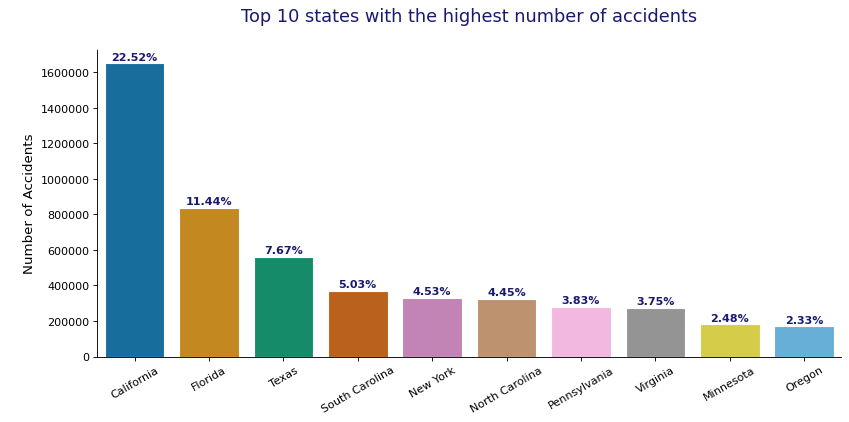

In [ ]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 80)
sns.set_style('ticks')

top_10 = states[:10]

sns.barplot(x=top_10['state'], y=top_10['cases'], palette='colorblind')

plt.title("Top 10 states with the highest number of accidents\n", fontdict = {'fontsize':16, 'color':'MidnightBlue'})
plt.ylabel("\nNumber of Accidents", fontdict = {'fontsize':12, 'color':'black'})
plt.xticks(rotation=30)
plt.xlabel(None)

total_accidents = df.shape[0]
for p in ax.patches :
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 10, weight = 'bold', color='MidnightBlue')

# Increase the font size of the axis tick labels
sns.set(rc={'xtick.labelsize': 12, 'ytick.labelsize': 12})

# Customize Y-axis tick labels to show real numbers
def format_func(value, _):
    return f'{value:.0f}'  # Format as whole numbers
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

for i in ['top', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)

plt.show()

**What are the top 10 Cities with most number of accidents?**

In [ ]:
cities = pd.DataFrame(df["City"].value_counts()).reset_index().sort_values(by='count',ascending=False)
cities = cities.rename(columns={'City':'city','count':'cases'})

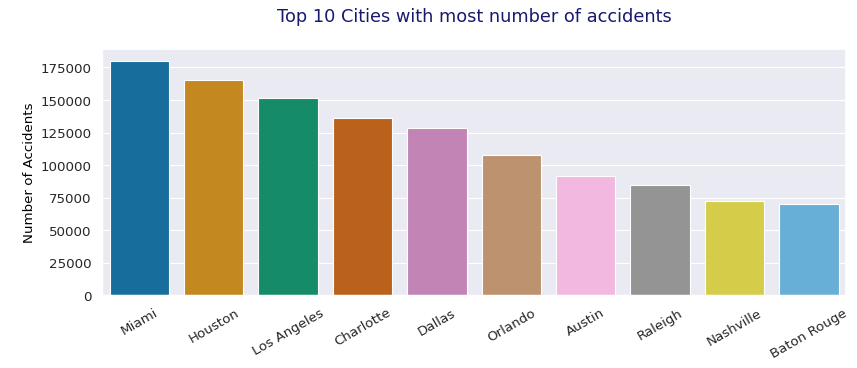

In [ ]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 80)
sns.set_style('ticks')

sns.barplot(x=cities[:10].city, y=cities[:10].cases, palette='colorblind')
plt.title("Top 10 Cities with most number of accidents\n", fontdict = {'fontsize':16, 'color':'MidnightBlue'})
plt.ylabel("\nNumber of Accidents", fontdict = {'fontsize':12, 'color':'black'})
plt.xlabel(None)
plt.xticks(rotation=30)

# Increase the font size of the axis tick labels
sns.set(rc={'xtick.labelsize': 12, 'ytick.labelsize': 12})

# Customize Y-axis tick labels to show real numbers
def format_func(value, _):
    return f'{value:.0f}'  # Format as whole numbers
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

for i in ['top', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)

plt.show()

In [ ]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], format="mixed", errors='coerce', dayfirst=True)
df["End_Time"] = pd.to_datetime(df["End_Time"], format="mixed", errors='coerce', dayfirst=True)

df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day
df["Hour"] = df["Start_Time"].dt.hour

**How do the no. of accidents change by year?**

In [ ]:
year_df = pd.DataFrame(df['Year'].value_counts()).reset_index().sort_values(by='Year', ascending=True)
year = year_df.rename(columns={'Year':'year','count':'cases'})

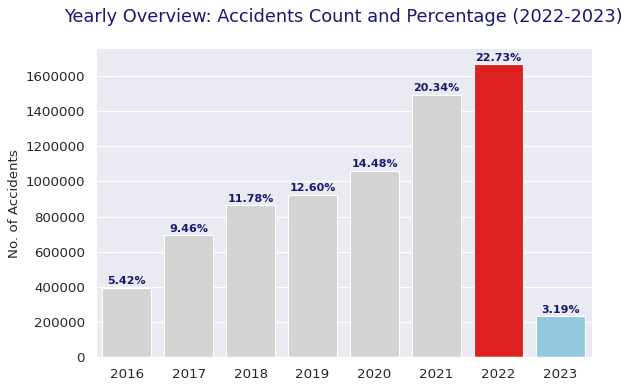

In [ ]:
fig, ax = plt.subplots(figsize = (8,5), dpi = 80)
sns.set_style('ticks')

colors = ['red' if val == max(year['cases']) else 'skyblue' if val == min(year['cases']) else 'lightgrey' for val in year['cases']]

sns.barplot(x=year.year, y=year.cases, palette=colors)
ax.spines[('top')].set_visible(False)
ax.spines[('right')].set_visible(False)
ax.set_xlabel(None)
ax.set_ylabel("No. of Accidents")
ax.set_title('Yearly Overview: Accidents Count and Percentage (2022-2023)\n', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

def format_func(value, _):
    return f'{value:.0f}'
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

for p in ax.patches :
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 10, weight='bold', color='MidnightBlue')

for i in ['top','right']:
    side = ax.spines[i]
    side.set_visible(False)

plt.show()

**What are the average monthly accidents (2016-2023)?**

In [ ]:
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index()
month = month_df.rename(columns={'Start_Time':'month#','count':'cases'}).sort_values(by='month#', ascending=True)

month_map = {1:'Jan' , 2:'Feb' , 3:'Mar' , 4:'Apr' , 5:'May' , 6:'Jun', 7:'Jul' , 8:'Aug', 9:'Sep',10:'Oct' , 11:'Nov' , 12:'Dec'}
month['month_name'] = month['month#'].map(month_map)

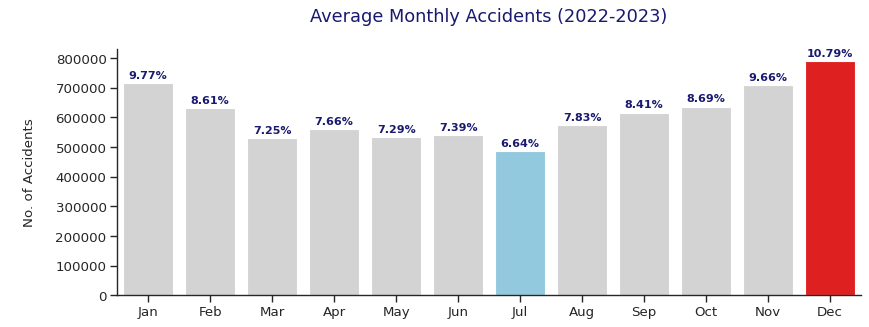

In [ ]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 80)
sns.set_style('ticks')

colors = ['red' if val == max(month['cases']) else 'skyblue' if val == min(month['cases']) else 'lightgrey' for val in month['cases']]

sns.barplot(x=month.month_name, y=month.cases, palette=colors)

ax.set_title('Average Monthly Accidents (2022-2023)\n', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
ax.set_ylabel("\nNo. of Accidents\n", fontsize = 12)
ax.set_xlabel(None)

def format_func(value, _):
    return f'{value:.0f}'
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

for p in ax.patches :
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
            height + 15000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 10, weight='bold', color='MidnightBlue')

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

plt.show()

**What days of the week have higher probability of accidents?**

In [ ]:
dow = pd.DataFrame(df['Start_Time'].dt.dayofweek.value_counts()).reset_index()
dow = dow.rename(columns={'Start_Time':'day_of_week', 'count':'cases'}).sort_values(by='day_of_week')
day_map = {0:'Monday' , 1:'Tuesday' , 2:'Wednesday' , 3:"Thursday" , 4:'Friday' , 5:"Saturday" , 6:'Sunday'}
dow['weekday'] = dow['day_of_week'].map(day_map)

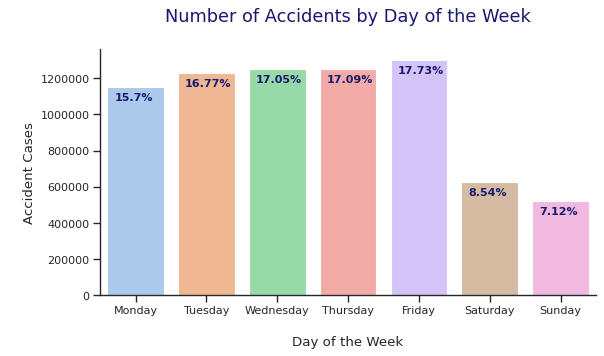

In [ ]:
fig, ax = plt.subplots(figsize = (8,4), dpi = 80)
sns.set_style('ticks')

ax=sns.barplot(y=dow.cases, x=dow.weekday, palette='pastel')
plt.title('Number of Accidents by Day of the Week\n', size=16, color='MidnightBlue')
plt.ylabel('\nAccident Cases', fontsize=12)
plt.xlabel('\nDay of the Week', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-55000,
    str(round((i.get_height()/total)*100, 2))+'%',
    va = "center", fontsize=10, weight='bold', color='MidnightBlue')

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

# Customize Y-axis tick labels to show real numbers
def format_func(value, _):
    return f'{value:.0f}'  # Format as whole numbers
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.show()

**What is the distribution of accidents throughout the day, and are there specific hours when accidents are more likely to occur?**

In [ ]:
hour_of_day = pd.DataFrame(df['Hour'].value_counts()).reset_index().rename(columns={'Hour':'hour','count':'cases'})
hour_of_day.sort_values(by='hour', inplace=True)

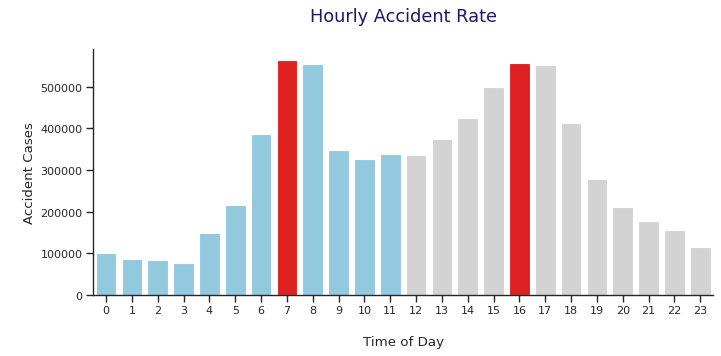

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)
sns.set_style('ticks')

colors = []
for x in hour_of_day['cases']:
    if int(hour_of_day[hour_of_day['cases'] == x]['hour']) <= 11:
        if x == max(list(hour_of_day['cases'])[:12]):
            colors.append('red')
        else:
            colors.append('skyblue')
    else:
        if x == max(list(hour_of_day['cases'])[12:]):
            colors.append('red')
        else:
            colors.append('lightgrey')

sns.barplot(x=hour_of_day.hour, y=hour_of_day.cases, palette=colors)

plt.title('Hourly Accident Rate\n', size=16, color='MidnightBlue')
plt.ylabel('\nAccident Cases', fontsize=12)
plt.xlabel('\nTime of Day', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

plt.show()

**What are the top weather conditions that contribute to the accidents?**

If we analyze the weather conditions, we can see that there are lots of them, so it's better to reduce the number of unique conditions.

In [ ]:
print("No. of Weather Conditions:", len(df["Weather_Condition"].unique()))

print("\nList of unique weather conditions:", list(df["Weather_Condition"].unique()))

No. of Weather Conditions: 142

List of unique weather conditions: ['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow', 'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow', 'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog', 'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', 'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog', 'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain', 'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand', 'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy', 'Rain Showers', 'Light Rain / Windy', 'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Light Rain Shower', 'Light Rain with Thunder', 'Mostly Cloudy / Windy', 'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm', 'Heavy Thunderstorms and Rain', 'Thunderstorm', 'Thunder', 'Heavy T-Storm', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow', 'Light Thunderstorms and Snow', 'Heavy Snow', 'Low Drifting Snow', 'Light

In [ ]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

In [ ]:
wc = pd.DataFrame(df['Weather_Condition'].value_counts()).reset_index().sort_values(by='count', ascending=False)
wc.rename(columns={'Weather_Condition':'weather_condition', 'count':'frequency'}, inplace=True)

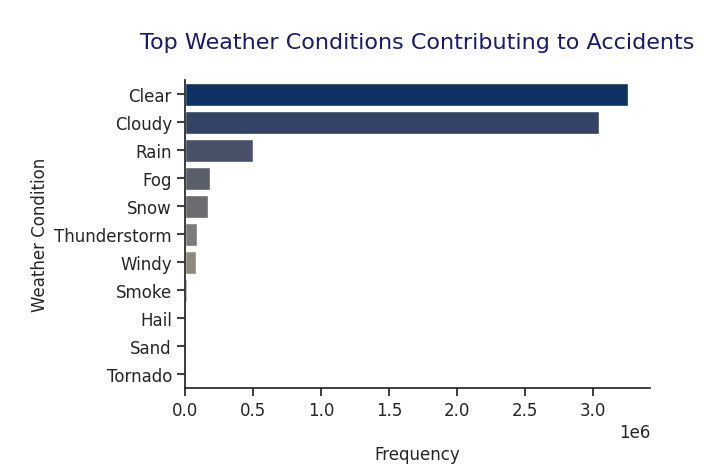

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.set_style('ticks')
sns.barplot(x='frequency', y='weather_condition', data=wc, palette='cividis', orient='h')

ax.set_xlabel('\nFrequency')
ax.set_ylabel('\nWeather Condition')
ax.set_title('\nTop Weather Conditions Contributing to Accidents\n', fontsize=16, color='MidnightBlue')
plt.xticks(rotation=0)

sns.set(rc={'xtick.labelsize': 10, 'ytick.labelsize': 10})

for i in ['top', 'right']:
    ax.spines[i].set_visible(False)

plt.show()

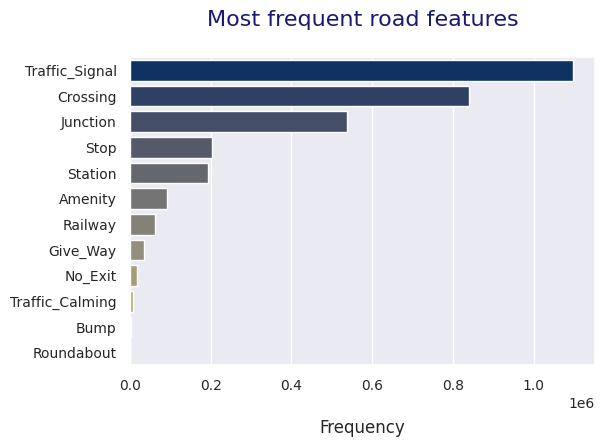

In [ ]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal"]

data = df[road_features].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=data.values, y=data.index, orient="h", palette='cividis')
plt.title("Most frequent road features\n", fontsize=16, color='MidnightBlue')
plt.xlabel("\nFrequency")

plt.show()